In [1]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
from matplotlib.lines import Line2D
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [2]:
with open("simu6a_data/simu6a_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
df_study = df_study.loc[df_study.session < 100]
df_test = df_test.loc[df_test.session < 100]

In [3]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,list,session
0,1569,1107,VINEGAR,PORCUPINE,0,0
1,30,696,APARTMENT,HEADBAND,0,0
2,1457,1443,THIGH,TECHNICIAN,0,0
3,1331,31,SNACK,APE,0,0
4,1377,1579,STEP,WAIST,0,0
...,...,...,...,...,...,...
25195,1352,239,SPINACH,CAPTAIN,41,99
25196,323,787,CLIMBER,KNOB,41,99
25197,299,1369,CHILD,STALLION,41,99
25198,504,63,DUCK,AWARD,41,99


In [4]:
df_test

,test_itemno,test_item,correct_ans,lag,list,session,order
0,468,DINNER,681,0,0,0,2
1,1579,WAIST,1377,2,0,0,2
2,1331,SNACK,31,4,0,0,1
3,1457,THIGH,1443,6,0,0,1
4,696,HEADBAND,30,8,0,0,2
...,...,...,...,...,...,...,...
25195,63,AWARD,504,2,41,99,2
25196,299,CHILD,1369,4,41,99,1
25197,323,CLIMBER,787,6,41,99,1
25198,239,CAPTAIN,1352,8,41,99,2


### Run CMR-IA

In [5]:
s_mat = np.load('../../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [6]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.7,
    beta_cue = 0.4,
    beta_distract = 0.01,
    beta_rec_post = 0.99,
    beta_rec = 0.5,
    gamma_fc = 0.2,
    gamma_cf = 0.2,
    s_fc = 0.1,
    s_cf = 0.1,
    c_thresh = 0.01,
    kappa = 0.04,
    lamb = 0.02,
    eta = 0.01,
    alpha = 0.9,
    omega = 3,
    phi_s = 1,
    phi_d = 1.3,
    nitems_in_accumulator = 48,
    d_ass = 0.8
)
params

# using parameters from simu5, the figure gives a U shape, because of U shape f_in diff, because primacy
# prob: how to flatten end? how to make initial decrease straight?
# 7.17 phi_s, phi_d could only flatten the last three
# phi_s control the base level and the last node
# phi_d control the last two

{'beta_enc': 0.7,
 'beta_rec': 0.5,
 'beta_cue': 0.4,
 'beta_rec_post': 0.99,
 'beta_distract': 0.01,
 'phi_s': 1,
 'phi_d': 1.3,
 's_cf': 0.1,
 's_fc': 0.1,
 'kappa': 0.04,
 'eta': 0.01,
 'omega': 3,
 'alpha': 0.9,
 'c_thresh': 0.01,
 'c_thresh_itm': 0.5,
 'c_thresh_ass': 0.5,
 'd_ass': 0.8,
 'lamb': 0.02,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 48,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.2,
 'gamma_cf': 0.2,
 'use_new_context': False}

In [7]:
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR2 Time: 77.70462107658386


,list,session,test_itemno,s_resp,s_rt,csim
0,0,0,468,1579.0,1890.0,0.499059
1,0,0,1579,681.0,2430.0,0.557561
2,0,0,1331,31.0,3750.0,0.474848
3,0,0,1457,-1.0,-1.0,-1.000000
4,0,0,696,30.0,4860.0,0.429519
...,...,...,...,...,...,...
25195,41,99,63,-1.0,-1.0,-1.000000
25196,41,99,299,504.0,3080.0,0.545436
25197,41,99,323,-1.0,-1.0,-1.000000
25198,41,99,239,-1.0,-1.0,-1.000000


In [8]:
df_simu = df_simu.merge(df_test,on=['session','list','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,order,correct
0,0,0,468,1579.0,1890.0,0.499059,DINNER,681,0,2,False
1,0,0,1579,681.0,2430.0,0.557561,WAIST,1377,2,2,False
2,0,0,1331,31.0,3750.0,0.474848,SNACK,31,4,1,True
3,0,0,1457,-1.0,-1.0,-1.000000,THIGH,1443,6,1,False
4,0,0,696,30.0,4860.0,0.429519,HEADBAND,30,8,2,True
...,...,...,...,...,...,...,...,...,...,...,...
25195,41,99,63,-1.0,-1.0,-1.000000,AWARD,504,2,2,False
25196,41,99,299,504.0,3080.0,0.545436,CHILD,1369,4,1,False
25197,41,99,323,-1.0,-1.0,-1.000000,CLIMBER,787,6,1,False
25198,41,99,239,-1.0,-1.0,-1.000000,CAPTAIN,1352,8,2,False


In [9]:
sessions = np.unique(df_simu.session)
for sess in sessions:
    df_tmp = df_study.loc[df_study.session == sess]
    tmp1 = df_tmp.study_itemno1.to_numpy()
    tmp2 = df_tmp.study_itemno2.to_numpy()
    tmp = np.concatenate((tmp1, tmp2))
    tmp = np.sort(tmp)
    tmp_test = df_simu.loc[df_study.session == sess,"test_itemno"]
    tmp_corr = df_simu.loc[df_study.session == sess,"correct_ans"]
    testid = np.searchsorted(tmp, tmp_test)
    corrid = np.searchsorted(tmp, tmp_corr)

    df_simu.loc[df_simu.session == sess, 'corr_fin']= [f_dif[sess][i][id] for i, id in enumerate(corrid)]
    # df_simu.loc[df_simu.session == sess, 'omean_fin'] = [np.mean(np.delete(f_dif[sess][i], id)) for i, id in corrid]
    df_simu.loc[df_simu.session == sess, 'omax_fin'] = [np.max(np.delete(f_dif[sess][i], id)) for i, id in enumerate(corrid)]
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,order,correct,corr_fin,omax_fin
0,0,0,468,1579.0,1890.0,0.499059,DINNER,681,0,2,False,-0.306193,-0.535682
1,0,0,1579,681.0,2430.0,0.557561,WAIST,1377,2,2,False,-0.557351,-0.477632
2,0,0,1331,31.0,3750.0,0.474848,SNACK,31,4,1,True,-0.563598,-0.628881
3,0,0,1457,-1.0,-1.0,-1.000000,THIGH,1443,6,1,False,-0.618796,-0.642307
4,0,0,696,30.0,4860.0,0.429519,HEADBAND,30,8,2,True,-0.586505,-0.616997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25195,41,99,63,-1.0,-1.0,-1.000000,AWARD,504,2,2,False,-0.496214,-0.665127
25196,41,99,299,504.0,3080.0,0.545436,CHILD,1369,4,1,False,-0.581676,-0.487495
25197,41,99,323,-1.0,-1.0,-1.000000,CLIMBER,787,6,1,False,-0.565671,-0.585796
25198,41,99,239,-1.0,-1.0,-1.000000,CAPTAIN,1352,8,2,False,-0.590971,-0.563725


In [10]:
# clean first 2 list
df_simu = df_simu.query("list > 1")
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,order,correct,corr_fin,omax_fin
12,2,0,887,816.0,1540.0,0.705176,MERMAID,816,0,1,True,-0.370811,-0.518674
13,2,0,10,1101.0,2730.0,0.531343,AGENT,1101,2,1,True,-0.508187,-0.669405
14,2,0,1411,-1.0,-1.0,-1.000000,SUPPER,1561,4,2,False,-0.645577,-0.643114
15,2,0,959,1104.0,4760.0,0.501818,NOTEBOOK,1104,6,2,True,-0.529225,-0.642143
16,2,0,1448,969.0,2640.0,0.447120,TEMPLE,969,8,2,True,-0.569317,-0.688404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25195,41,99,63,-1.0,-1.0,-1.000000,AWARD,504,2,2,False,-0.496214,-0.665127
25196,41,99,299,504.0,3080.0,0.545436,CHILD,1369,4,1,False,-0.581676,-0.487495
25197,41,99,323,-1.0,-1.0,-1.000000,CLIMBER,787,6,1,False,-0.565671,-0.585796
25198,41,99,239,-1.0,-1.0,-1.000000,CAPTAIN,1352,8,2,False,-0.590971,-0.563725


In [11]:
df_simu.to_pickle("simu6a_data/simu6a_result.pkl")

### PLOT

In [12]:
with open("simu6a_data/simu6a_result.pkl", 'rb') as inp:
    df_simu = pickle.load(inp)

In [13]:
df_fin = df_simu.groupby('lag')[['corr_fin','omax_fin']].mean().reset_index()
df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
df_fin

,lag,corr_fin,omax_fin,dif
0,0,-0.348112,-0.547932,0.199820
1,2,-0.564469,-0.654349,0.089880
2,4,-0.595458,-0.639614,0.044156
3,6,-0.593297,-0.609273,0.015975
4,8,-0.587487,-0.600700,0.013213
5,10,-0.569870,-0.597971,0.028101


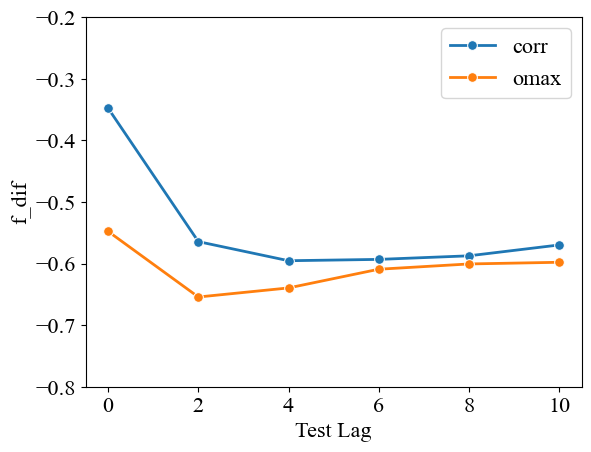

In [14]:
sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7, label='corr')
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7, label='omax')
plt.ylim([-0.8,-0.2])
plt.xlabel('Test Lag')
plt.ylabel('f_dif')
# plt.savefig('fig/simu3_hr.pdf')
plt.show()

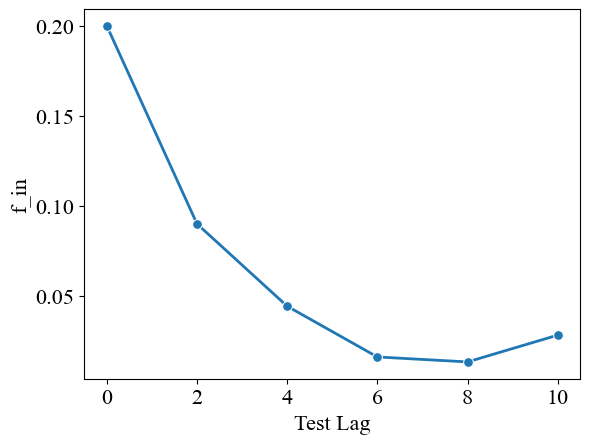

In [15]:
sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# plt.ylim([0,1])
plt.xlabel('Test Lag')
plt.ylabel('f_in')
# plt.savefig('fig/simu3_hr.pdf')
plt.show()

In [16]:
df_laggp = df_simu.groupby(['lag','order']).correct.mean().to_frame(name='corr_rate').reset_index()
df_laggp

,lag,order,corr_rate
0,0,1,0.980837
1,0,2,0.981656
2,2,1,0.704804
3,2,2,0.717819
4,4,1,0.380880
5,4,2,0.394464
6,6,1,0.283199
7,6,2,0.303181
8,8,1,0.269849
9,8,2,0.274782


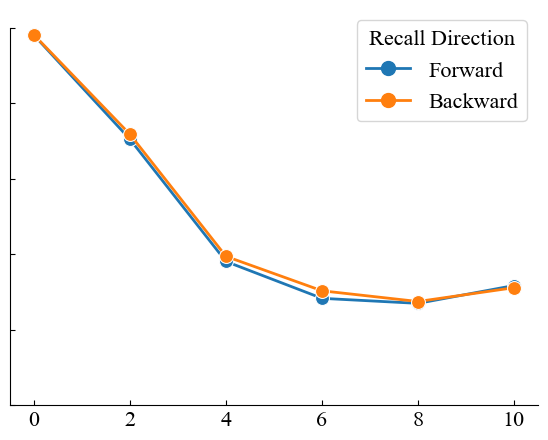

In [17]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines['left'].set_bounds(0, 1)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp, x='lag', y='corr_rate', linewidth=2, marker='o', markersize = 10, hue='order',palette='tab10')
plt.ylim([0,1.05])
plt.xlabel('Test Lag')
plt.ylabel('Probablility of Recall')
ax.set(xlabel=None, ylabel=None)
plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o',
                          markersize = 10, linestyle='-',label = 'Forward'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='o',
                          markersize = 10, linestyle='-', label = 'Backward')]
L = plt.legend(handles = legend_elements, title='Recall Direction',loc='upper right')

# plt.savefig('simu6a_fig/simu6a_recall.pdf')
plt.show()